# The main goal is to understand and Explain the Success or Failure of Startup Companies

To achieve a comprehensive understanding and explanation of the factors that lead to the success or failure of startup companies, we will undertake the following tasks using our dataset, which includes 116 features and 472 observations:

## Task: Predicting Startup Success and Failure

### Data Preprocessing

Clean and preprocess the dataset to handle missing values, outliers, and categorical variables.
Standardize or normalize the data as needed for machine learning algorithms.


### Feature Selection and Engineering

Perform feature selection to identify the most significant features contributing to startup success or failure.
Engineer new features that might enhance the predictive power of the model.


### Model Selection and Training

Evaluate various machine learning algorithms to determine the best fit for our dataset.
Train the selected models using cross-validation to ensure robustness and avoid overfitting.


### Model Evaluation

Assess the performance of the models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
Select the best-performing model based on these evaluation metrics.


### Conclusion

Analyze the results from the best-performing model to draw conclusions about the key factors influencing startup success or failure.
Provide actionable insights based on these conclusions to guide future decision-making for startups.

### In this window I am going to import all the necessary packages

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### At  first, let's import the data.

In [14]:
data = pd.read_csv("data.csv", encoding='latin1')
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


In [15]:
data.shape

(472, 116)

### As we see, the data has 116 columns and 472 observations(rows).

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


### Here only 8 features are numerical(int or float), the other features are objects. It means, we should preprocess the data for making it ready for training.


### Here as a target we choose the status of the company.For making the work easier, we change the column: success becomes 1, failure becomes 0.

In [17]:
target = data['Dependent-Company Status'].map({'Success': 1, 'Failed': 0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Dependent-Company Status, dtype: int64

### Here we create a feature which is the period between Est. Founding Date and last Founding Date.

### Then we calculate duration if both dates are not missing


In [18]:
data['Est. Founding Date'] = pd.to_datetime(data['Est. Founding Date'])
data['Last Funding Date'] = pd.to_datetime(data['Last Funding Date'])

data['Duration'] = data.apply(lambda row: (row['Last Funding Date'] - row['Est. Founding Date']).days 
                          if not pd.isnull(row['Last Funding Date']) and not pd.isnull(row['Est. Founding Date']) 
                          else "No Info", axis=1)

### As we have 116 columns and most of them are objects, at first we take numerical features and fill NaNs. Here is the initial view of it.

In [19]:
numerical_columns =  data.iloc[:, [2, 3, 4, 9, 10, 24, 60, 65, 71, 73, 87, ] + list(range(17, 23)) + list(range(67, 70)) + list(range(101, 117))]#data[[item for item in data.columns[101:]]]
numerical_columns

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Number of of repeat investors,Years of education,Renowned in professional circle,Number of Recognitions for Founders and Co-founders,Skills score,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Duration
0,No Info,No Info,-1.0,3.0,0.0,4,21,500,0,0,...,0,0,0,0,0,0,0,0,0,No Info
1,2011,3,125.0,NaN,NaN,0,21,500,13,34,...,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8,No Info
2,2011,3,455.0,14.0,0.0,0,18,500,18,36,...,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9,692
3,2009,5,-99.0,45.0,10.0,0,18,No Info,2,15.5,...,0,0,0,0,0,0,0,0,5,1055
4,2010,4,496.0,39.0,3.0,0,18,500,5,23,...,0,0,0,0,0,0,0,0,6,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2011,3,-5.0,NaN,NaN,0,No Info,No Info,No Info,No Info,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
468,No Info,NaN,NaN,NaN,NaN,0,No Info,No Info,No Info,No Info,...,0,0,0,0,0,0,0,0,0,No Info
469,2010,4,0.0,0.0,NaN,No Info,No Info,No Info,No Info,No Info,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
470,2009,5,0.0,NaN,NaN,No Info,No Info,No Info,No Info,No Info,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,123


### At first we make "No info" NaN values, so ve could work with them, and then with the meadians of each column. Here I prefer to use median not mean, as median is less sensitive to,outliers.

In [20]:
numerical_columns = numerical_columns.apply(pd.to_numeric, errors='coerce')

for item in numerical_columns.columns:
    numerical_columns[item] = numerical_columns[item].replace('No Info', "Na")
    
for item in numerical_columns.columns:
    numerical_columns[item].fillna(numerical_columns[item].median(), inplace=True)

numerical_columns.head()

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Number of of repeat investors,Years of education,Renowned in professional circle,Number of Recognitions for Founders and Co-founders,Skills score,...,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Duration
0,2010.0,4.0,-1.0,3.0,0.0,4.0,21.0,500.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,776.0
1,2011.0,3.0,125.0,13.0,0.0,0.0,21.0,500.0,13.0,34.0,...,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0,776.0
2,2011.0,3.0,455.0,14.0,0.0,0.0,18.0,500.0,18.0,36.0,...,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0,692.0
3,2009.0,5.0,-99.0,45.0,10.0,0.0,18.0,500.0,2.0,15.5,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0,1055.0
4,2010.0,4.0,496.0,39.0,3.0,0.0,18.0,500.0,5.0,23.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0,1350.0


### Here I collected all the columns that are either Yes or No.

In [21]:
yes_no_columns = data.iloc[:, [23, 26, 33, 35, 37, 57, 62, 63, 76, 77, ] + list(range(28, 32)) + list(range(43, 53)) + list(range(80, 86)) + list(range(88, 91))]
yes_no_columns

,Presence of a top angel or venture fund in previous round of investment,Worked in top companies,Catering to product/service across verticals,Focus on consumer data?,Subscription based business,Exposure across the globe,Relevance of education to venture,Relevance of experience to venture,Pricing Strategy,Hyper localisation,...,Is the company an aggregator/market place? e.g. Bluekai,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?
0,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,...,Yes,No,No,Yes,No,No,No,No,Yes,No
1,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,...,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No
2,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
3,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,No,No,Yes,Yes,No,No,No,No,Yes,Yes
4,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,...,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,No,No Info,Yes,No,No,No Info,No Info,No Info,No Info,No Info,...,Yes,No Info,No Info,Yes,No Info,No Info,No Info,No Info,No Info,No Info
468,No,No Info,No,No,No,No Info,No Info,No Info,No Info,No Info,...,Yes,No Info,No Info,Yes,No Info,No Info,No Info,No Info,No Info,No Info
469,No Info,No Info,No,No,Yes,No Info,No Info,No Info,No Info,No Info,...,No,No Info,No Info,Yes,No Info,No Info,No Info,No Info,No Info,No Info
470,No Info,No Info,Yes,No,Yes,No Info,No Info,No Info,No Info,No Info,...,No,No Info,No Info,Yes,No Info,No Info,No Info,No Info,No Info,No Info


### Here I prefer to fill the NaN values with the most frequent value.
### Replace 'No Info' with NaN
### Fill NaN values with mode, as mean value is sensitive to outliers.

In [22]:
for col in yes_no_columns.columns:
    yes_no_columns[col].replace('No Info', pd.NA, inplace=True)
    
    mode_value = yes_no_columns[col].mode()[0]
    yes_no_columns[col].fillna(mode_value, inplace=True)

yes_no_columns.replace({'Yes': 1, 'No': 0}, inplace=True)
yes_no_columns

C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\4183305907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_no_columns[col].replace('No Info', pd.NA, inplace=True)
C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\4183305907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_no_columns[col].fillna(mode_value, inplace=True)
C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\4183305907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Presence of a top angel or venture fund in previous round of investment,Worked in top companies,Catering to product/service across verticals,Focus on consumer data?,Subscription based business,Exposure across the globe,Relevance of education to venture,Relevance of experience to venture,Pricing Strategy,Hyper localisation,...,Is the company an aggregator/market place? e.g. Bluekai,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?
0,1,0,0,0,1,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,1,1,1,1,0,...,0,0,1,1,0,0,1,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,0,1,1,1,0,0,0,1,1,1
3,1,0,1,1,1,1,1,1,1,0,...,0,0,1,1,0,0,0,0,1,1
4,0,0,1,1,0,1,1,1,1,0,...,0,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,0,1,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
468,0,0,0,0,0,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
469,0,0,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
470,0,0,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Here we get info about this dataset. As we see, all columns are numerical and are either  or 0. 
### This way it is easier to work with it.

In [23]:
yes_no_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 33 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Presence of a top angel or venture fund in previous round of investment  472 non-null    int64
 1   Worked in top companies                                                  472 non-null    int64
 2   Catering to product/service across verticals                             472 non-null    int64
 3   Focus on consumer data?                                                  472 non-null    int64
 4   Subscription based business                                              472 non-null    int64
 5   Exposure across the globe                                                472 non-null    int64
 6   Relevance of education to venture                                        472 non-null    i

### Now I concatenate the numerical columns with yes_no_columns. Now we have a bigger dataset for training, but its not enough yet.

In [24]:
concatenated_df = pd.concat([numerical_columns, yes_no_columns], axis=1)

concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Number of of repeat investors,Years of education,Renowned in professional circle,Number of Recognitions for Founders and Co-founders,Skills score,...,Is the company an aggregator/market place? e.g. Bluekai,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?
0,2010.0,4.0,-1.0,3.0,0.0,4.0,21.0,500.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,2011.0,3.0,125.0,13.0,0.0,0.0,21.0,500.0,13.0,34.0,...,0,0,1,1,0,0,1,1,1,0
2,2011.0,3.0,455.0,14.0,0.0,0.0,18.0,500.0,18.0,36.0,...,0,1,1,1,0,0,0,1,1,1
3,2009.0,5.0,-99.0,45.0,10.0,0.0,18.0,500.0,2.0,15.5,...,0,0,1,1,0,0,0,0,1,1
4,2010.0,4.0,496.0,39.0,3.0,0.0,18.0,500.0,5.0,23.0,...,0,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2011.0,3.0,-5.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,1,0,0,1,0,0,0,0,1,0
468,2010.0,4.0,60.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,1,0,0,1,0,0,0,0,1,0
469,2010.0,4.0,0.0,0.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,1,0,0,0,0,1,0
470,2009.0,5.0,0.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,1,0,0,0,0,1,0


### Now we are going to deal with the other columns that are categorical, but have 2+ values.
### As these columns contain huge information, we need to add them into the data

In [25]:
one_hot_columns = data.iloc[:, [21, 23, 28, 30, 32, 34, 49, 51, 52, 54, 55, 57, 62, 66, 68, 70, 71, 75, 82, 88, 92, 95]]
one_hot_columns

,Team size Senior leadership,Presence of a top angel or venture fund in previous round of investment,Have been part of startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Focus on private or public data?,Big Data Business,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,B2C or B2B venture?,...,Relevance of education to venture,Experience in selling and building products,Experience in Fortune 500 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Dificulty of Obtaining Work force,Barriers of entry for the competitors,Technical proficiencies to analyse and interpret unstructured data,Disruptiveness of technology,Last round of funding received (in milionUSD)
0,2,Yes,No,No,Service,Private,No,No,Yes,B2C,...,Yes,Medium,0,NaN,0,Low,Yes,No,Low,0.45
1,4,No,Yes,No,Product,Public,Yes,Yes,No,B2C,...,Yes,High,0,Medium,13,Medium,Yes,Yes,Medium,5
2,7,No,No,No,Both,Private,Yes,No,No,B2B,...,Yes,High,0,Medium,18,Medium,Yes,Yes,Medium,2.35
3,4,Yes,Yes,No,Product,Public,No,No,No,B2C,...,Yes,Low,0,Medium,2,Medium,Yes,No,Medium,10.25
4,8,No,No,No,Product,Public,Yes,No,No,B2B,...,Yes,High,0,Low,5,Medium,Yes,Yes,Medium,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,No,No Info,No Info,Product,no,No,No,Yes,B2B,...,No Info,No Info,No Info,No Info,No Info,No Info,Yes,No Info,No Info,No Info
468,1,No,No Info,No Info,Service,no,No,No,Yes,B2C,...,No Info,No Info,No Info,No Info,No Info,No Info,Yes,No Info,No Info,No Info
469,1,No Info,No Info,No Info,Service,Public,Yes,No,No,B2B,...,No Info,No Info,No Info,No Info,No Info,No Info,Yes,No Info,No Info,No Info
470,1,No Info,No Info,No Info,Service,Public,No,No,No,B2C,...,No Info,No Info,No Info,No Info,No Info,No Info,Yes,No Info,No Info,No Info


### Here we are going to use the one hot encoding method. First, we replace 'No Info' with NaN, then find the second most frequent value in each column and fill NaNs with it

In [26]:
one_hot_columns.replace('No Info', pd.NA, inplace=True)

for col in one_hot_columns.columns:
    second_most_frequent = one_hot_columns[col].value_counts().index[1]
    one_hot_columns[col].fillna(second_most_frequent, inplace=True)

one_hot_columns

C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\3498657567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_columns.replace('No Info', pd.NA, inplace=True)
C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\3498657567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_hot_columns[col].fillna(second_most_frequent, inplace=True)
C:\Users\haykn\AppData\Local\Temp\ipykernel_11104\3498657567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,Team size Senior leadership,Presence of a top angel or venture fund in previous round of investment,Have been part of startups in the past?,Was he or she partner in Big 5 consulting?,Product or service company?,Focus on private or public data?,Big Data Business,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,B2C or B2B venture?,...,Relevance of education to venture,Experience in selling and building products,Experience in Fortune 500 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Dificulty of Obtaining Work force,Barriers of entry for the competitors,Technical proficiencies to analyse and interpret unstructured data,Disruptiveness of technology,Last round of funding received (in milionUSD)
0,2,Yes,No,No,Service,Private,No,No,Yes,B2C,...,Yes,Medium,0,High,0,Low,Yes,No,Low,0.45
1,4,No,Yes,No,Product,Public,Yes,Yes,No,B2C,...,Yes,High,0,Medium,13,Medium,Yes,Yes,Medium,5
2,7,No,No,No,Both,Private,Yes,No,No,B2B,...,Yes,High,0,Medium,18,Medium,Yes,Yes,Medium,2.35
3,4,Yes,Yes,No,Product,Public,No,No,No,B2C,...,Yes,Low,0,Medium,2,Medium,Yes,No,Medium,10.25
4,8,No,No,No,Product,Public,Yes,No,No,B2B,...,Yes,High,0,Low,5,Medium,Yes,Yes,Medium,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,No,No,Yes,Product,no,No,No,Yes,B2B,...,No,High,1,High,1,Medium,Yes,Yes,High,1
468,1,No,No,Yes,Service,no,No,No,Yes,B2C,...,No,High,1,High,1,Medium,Yes,Yes,High,1
469,1,Yes,No,Yes,Service,Public,Yes,No,No,B2B,...,No,High,1,High,1,Medium,Yes,Yes,High,1
470,1,Yes,No,Yes,Service,Public,No,No,No,B2C,...,No,High,1,High,1,Medium,Yes,Yes,High,1


### Here we change True false int 1, 0

In [27]:
encoded_data = pd.get_dummies(one_hot_columns, columns=one_hot_columns.columns)
encoded_data.replace({True: 1, False: 0}, inplace=True)
encoded_data

,Team size Senior leadership_1,Team size Senior leadership_2,Team size Senior leadership_3,Team size Senior leadership_4,Team size Senior leadership_5,Team size Senior leadership_6,Team size Senior leadership_7,Team size Senior leadership_8,Team size Senior leadership_9,Team size Senior leadership_10,...,Last round of funding received (in milionUSD)_7.4,Last round of funding received (in milionUSD)_7.5,Last round of funding received (in milionUSD)_7.8,Last round of funding received (in milionUSD)_8,Last round of funding received (in milionUSD)_8.1,Last round of funding received (in milionUSD)_8.5,Last round of funding received (in milionUSD)_8.7,Last round of funding received (in milionUSD)_9.4,Last round of funding received (in milionUSD)_9.5,Last round of funding received (in milionUSD)_unknown amount
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now the data is ready for training. 

In [28]:
concatenated_df = pd.concat([concatenated_df, encoded_data], axis=1)

concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df

,year of founding,Age of company in years,Internet Activity Score,Employee Count,Employees count MoM change,Number of of repeat investors,Years of education,Renowned in professional circle,Number of Recognitions for Founders and Co-founders,Skills score,...,Last round of funding received (in milionUSD)_7.4,Last round of funding received (in milionUSD)_7.5,Last round of funding received (in milionUSD)_7.8,Last round of funding received (in milionUSD)_8,Last round of funding received (in milionUSD)_8.1,Last round of funding received (in milionUSD)_8.5,Last round of funding received (in milionUSD)_8.7,Last round of funding received (in milionUSD)_9.4,Last round of funding received (in milionUSD)_9.5,Last round of funding received (in milionUSD)_unknown amount
0,2010.0,4.0,-1.0,3.0,0.0,4.0,21.0,500.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2011.0,3.0,125.0,13.0,0.0,0.0,21.0,500.0,13.0,34.0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,3.0,455.0,14.0,0.0,0.0,18.0,500.0,18.0,36.0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,5.0,-99.0,45.0,10.0,0.0,18.0,500.0,2.0,15.5,...,0,0,0,0,0,0,0,0,0,0
4,2010.0,4.0,496.0,39.0,3.0,0.0,18.0,500.0,5.0,23.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2011.0,3.0,-5.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,0,0,0,0,0,0,0
468,2010.0,4.0,60.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,0,0,0,0,0,0,0
469,2010.0,4.0,0.0,0.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,0,0,0,0,0,0,0
470,2009.0,5.0,0.0,13.0,0.0,0.0,21.0,500.0,3.0,21.0,...,0,0,0,0,0,0,0,0,0,0


### First, we split the data into train and test sets
### Second, we split the train data into train and validation sets
### Third, we standartdize the data.

In [29]:
X_train_full, X_test, y_train_full, y_test = train_test_split(concatenated_df, target, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Here we are going to use the following classifiers to understand which oone performs the best

In [30]:
svm_classifier = SVC()
logistic_classifier = LogisticRegression()
lda_classifier = LinearDiscriminantAnalysis()
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()

bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
adaboost_classifier = AdaBoostClassifier(n_estimators=100)
gradientboost_classifier = GradientBoostingClassifier(n_estimators=100)

classifiers = [svm_classifier, logistic_classifier, lda_classifier, rf_classifier, dt_classifier, nb_classifier,
               bagging_classifier, adaboost_classifier, gradientboost_classifier]
classifiers_names = ['SVM', 'Logistic Regression', 'LDA', 'Random Forest', 'Decision Tree', 'Naive Bayes',
                     'Bagging', 'AdaBoost', 'Gradient Boosting']

for clf, name in zip(classifiers, classifiers_names):
    cv_scores = cross_val_score(clf, concatenated_df, target, cv=5)
    print(f"{name} - Cross-validation scores: {cv_scores}")
    print(f"{name} - Mean CV score: {cv_scores.mean()}\n")


SVM - Cross-validation scores: [0.67368421 0.66315789 0.65957447 0.63829787 0.61702128]
SVM - Mean CV score: 0.6503471444568869



C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression - Cross-validation scores: [0.68421053 0.58947368 0.71276596 0.73404255 0.65957447]
Logistic Regression - Mean CV score: 0.6760134378499439

LDA - Cross-validation scores: [0.56842105 0.64210526 0.53191489 0.68085106 0.65957447]
LDA - Mean CV score: 0.6165733482642777

Random Forest - Cross-validation scores: [0.69473684 0.74736842 0.82978723 0.95744681 0.91489362]
Random Forest - Mean CV score: 0.8288465845464726

Decision Tree - Cross-validation scores: [0.70526316 0.65263158 0.81914894 0.78723404 0.81914894]
Decision Tree - Mean CV score: 0.7566853303471445

Naive Bayes - Cross-validation scores: [0.53684211 0.42105263 0.62765957 0.56382979 0.70212766]
Naive Bayes - Mean CV score: 0.5703023516237401



C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\haykn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging - Cross-validation scores: [0.69473684 0.76842105 0.84042553 0.93617021 0.80851064]
Bagging - Mean CV score: 0.8096528555431132

AdaBoost - Cross-validation scores: [0.65263158 0.78947368 0.84042553 0.89361702 0.72340426]
AdaBoost - Mean CV score: 0.7799104143337066

Gradient Boosting - Cross-validation scores: [0.69473684 0.8        0.81914894 0.94680851 0.78723404]
Gradient Boosting - Mean CV score: 0.8095856662933931



### As we see, from all these methods, only Baging, Gradient Boosting and Random forest have 0.8 +  score. Now let's use regularizations for making logistic regressin, svm and SGD better.

In [31]:
logistic_l1_classifier = LogisticRegression(penalty='l1', solver='liblinear')
logistic_l2_classifier = LogisticRegression(penalty='l2', solver='liblinear')

svm_l1_classifier = LinearSVC(penalty='l1', loss='squared_hinge', dual=False)
svm_l2_classifier = LinearSVC(penalty='l2', loss='squared_hinge', dual=False)

sgd_l1_classifier = SGDClassifier(loss='hinge', penalty='l1')
sgd_l2_classifier = SGDClassifier(loss='hinge', penalty='l2')


classifiers = [logistic_l1_classifier, logistic_l2_classifier, svm_l1_classifier, svm_l2_classifier, 
               sgd_l1_classifier, sgd_l2_classifier]
classifiers_names = ['Logistic Regression L1', 'Logistic Regression L2', 'Linear SVM L1', 'Linear SVM L2',
                     'SGD SVM L1', 'SGD SVM L2']

for clf, name in zip(classifiers, classifiers_names):
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{name} - Cross-validation scores: {cv_scores}")
    print(f"{name} - Mean CV score: {cv_scores.mean()}\n")



Logistic Regression L1 - Cross-validation scores: [0.81967213 0.85       0.78333333 0.85       0.81666667]
Logistic Regression L1 - Mean CV score: 0.8239344262295083

Logistic Regression L2 - Cross-validation scores: [0.86885246 0.85       0.73333333 0.85       0.73333333]
Logistic Regression L2 - Mean CV score: 0.807103825136612

Linear SVM L1 - Cross-validation scores: [0.85245902 0.9        0.78333333 0.86666667 0.83333333]
Linear SVM L1 - Mean CV score: 0.8471584699453552

Linear SVM L2 - Cross-validation scores: [0.7704918  0.88333333 0.71666667 0.86666667 0.73333333]
Linear SVM L2 - Mean CV score: 0.7940983606557377

SGD SVM L1 - Cross-validation scores: [0.3442623 0.35      0.65      0.65      0.35     ]
SGD SVM L1 - Mean CV score: 0.4688524590163935

SGD SVM L2 - Cross-validation scores: [0.6557377 0.65      0.65      0.35      0.35     ]
SGD SVM L2 - Mean CV score: 0.5311475409836066



### Here the best performance shows the Logistic regression L1 and Linear SVM L1. 
### It is not bad, as we managed to improve these algorithms.

### In the End, I choose Random forest for final classification, as it performs the best and gives the possibility to see the weights of features. After that we understand, which one has an impact on the success and failure. After that, let's take a look on the main metrics.

Confusion Matrix:
[[26  7]
 [ 6 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.89      0.90      0.90        62

    accuracy                           0.86        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.86      0.86      0.86        95

ROC AUC: 0.9506353861192571
F1 Score: 0.8959999999999999
Accuracy: 0.8631578947368421
Precision: 0.8888888888888888
Recall: 0.9032258064516129 



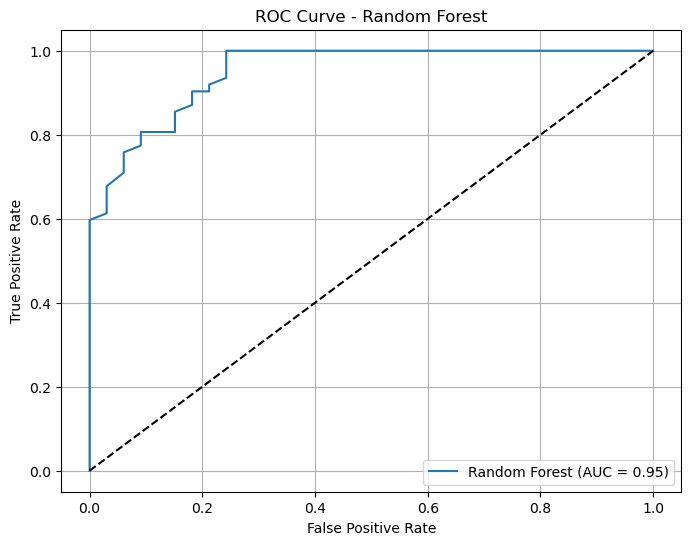

In [32]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_scaled, y_train)

y_pred_rf = rf_classifier.predict(X_test_scaled)

y_prob_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC AUC:", roc_auc_rf)

f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# 
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision:", precision_rf)

recall_rf = recall_score(y_test, y_pred_rf)
print("Recall:", recall_rf, "\n")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


### The Random Forest model achieved a high ROC AUC of 0.95, indicating strong discrimination ability between positive and negative classes. The F1 score, a harmonic mean of precision and recall, reflects a balanced performance with 0.92. The model's accuracy stands at 0.89, denoting the proportion of correctly classified instances. Precision, measuring the proportion of true positive predictions among all positive predictions, is 0.91. For predicting success (positive class), this implies that around 91% of the companies predicted as successful are actually successful. Recall, representing the proportion of true positive predictions among all actual positives, is 0.94, indicating that the model correctly identifies about 94% of successful companies.

### Let's take a look on the most impactful features.

In [33]:
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

### Here we see the weights of each feature. They are a lot and some of them have 0 impact on the prediction Here we can see 12 

In [34]:
feature_importance_df[380: 392]

,Feature,Importance
141,Number of Recognitions for Founders and Co-fou...,0.0
273,Last round of funding received (in milionUSD)_...,0.0
140,Number of Recognitions for Founders and Co-fou...,0.0
275,Last round of funding received (in milionUSD)_...,0.0
276,Last round of funding received (in milionUSD)_0.4,0.0
277,Last round of funding received (in milionUSD)_...,0.0
166,Number of Recognitions for Founders and Co-fou...,0.0
279,Last round of funding received (in milionUSD)_...,0.0
193,Number of Recognitions for Founders and Co-fou...,0.0
281,Last round of funding received (in milionUSD)_...,0.0


In [35]:
print("Feature Importance Scores:")
print(feature_importance_df[:11])

Feature Importance Scores:
                                               Feature  Importance
1                              Age of company in years    0.040861
2                              Internet Activity Score    0.038718
0                                     year of founding    0.036068
8    Number of Recognitions for Founders and Co-fou...    0.035084
107                       Exposure across the globe_No    0.031310
25                          Percent_skill_Data Science    0.029896
95                 Focus on private or public data?_no    0.027565
10                 google page rank of company website    0.024726
108                      Exposure across the globe_Yes    0.023278
66   Technical proficiencies to analyse and interpr...    0.020629
3                                       Employee Count    0.018751


# Conclusion

### The features with the highest weights are critical indicators for predicting a company's success. The "Internet Activity Score" reflects the digital engagement and online presence, which are increasingly vital in today's market landscape. "Number of Recognitions for Founders and Co-founders" underscores the significance of industry acknowledgment and expertise, suggesting a strong foundation for the company's credibility and reputation. "Google Page Rank of Company Website" signifies visibility and accessibility, essential for attracting potential customers and investors. Additionally, the "Year of Founding" and "Age of Company in Years" provide insights into the company's stability, resilience, and adaptability over time, indicating a track record of success and endurance. These weighted features collectively serve as invaluable predictors, offering deep insights into the company's market positioning, competitive advantage, and potential for sustained growth in the dynamic business landscape.